1. <a href="#intro">Introduction</a>
2. <a href="#imp">Importing data</a>
3. <a href="#exp">Exploring data</a>
4. <a href="#prep">Preparing data</a>
5. <a href="#models">Build and apply models</a>
6. <a href="#fmodel">Build Final model</a>
7. <a href="#export">Export model</a>

## <a id="intro">Introduction</a>

Telco ia a fictional telecomunication company that provided home phone and Internet services to 7043 customers in California in Q3.

The context is to explore the dataset and build a model to predict churn, in order to retain customers by developing a customer centered retention program.

## <a id="imp">Importing data</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import joblib

In [2]:
df_main = pd.read_csv("./data/Telco-Customer-Churn.txt")
df_main.shape

(7043, 21)

## <a id="exp">Exploring data</a>

From <a href="https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113">IBM Telco customer churn</a> website, we could retrieve all feature descriptions:

* CustomerID: A unique ID that identifies each customer.
* Gender: The customer’s gender: Male, Female
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Indicate if the customer has a partner: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter.
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company.

In [3]:
df_main.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* <a id="ins1">insight 1</a><br>
Although there are only 3 numeric columns, we can see that there are various binary categorical features that we can encode as 0/1. We have to transform it in order to investigate further:

In [5]:
df = df_main.copy()

all_labelencoders = {}

binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod', 'Churn']

for name in binary_cols:
    le = LabelEncoder()
    all_labelencoders[name] = le
    df[name] = le.fit_transform(df[name])

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [7]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


* <a id="ins2">insight 2</a><br>
Note that we still have a feature formatted as object. <br>
As machine learning models, in general, do not understand strings, we'll have to change it to numeric.

confirming null value count per column:

In [9]:
df.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

Checking full correlation of features, correlation of features to our target ("Churn") and dataset pairplot:

<AxesSubplot:>

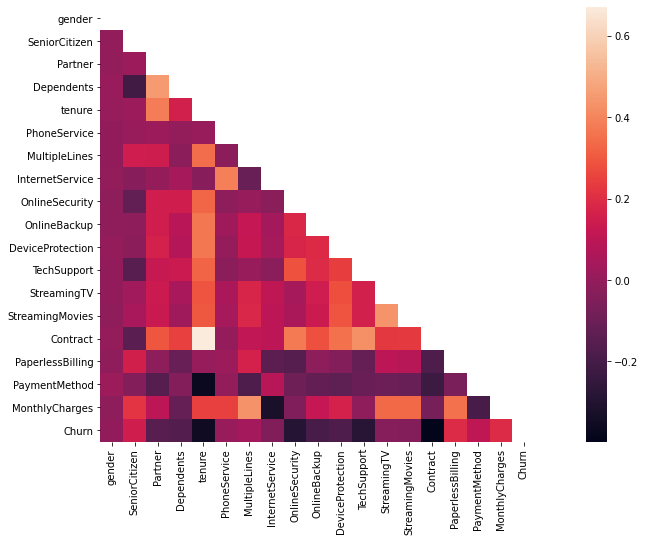

In [10]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), mask=mask, annot=False, square=True)

In [11]:
# unstacking correlation to check highest correlation pairs

c = df.corr().abs()
unstack_corr = c.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']


# check feature pairs above 0.3 in correlation

cond1 = (corr_pairs.feature1 != corr_pairs.feature2)
cond2 = (corr_pairs['corr']>0.30)

corr_pairs[cond1 & cond2]

,feature1,feature2,corr
1,tenure,Contract,0.671607
2,Partner,Dependents,0.452676
3,StreamingTV,StreamingMovies,0.434772
4,MonthlyCharges,MultipleLines,0.433576
5,Contract,TechSupport,0.425367
6,Contract,Churn,0.396713
7,PhoneService,InternetService,0.387436
8,Partner,tenure,0.379697
9,OnlineSecurity,Contract,0.374416
10,DeviceProtection,tenure,0.371105


<AxesSubplot:>

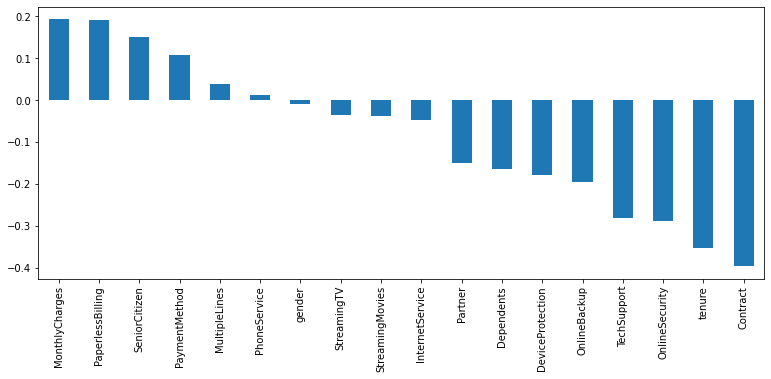

In [12]:
corr = df.corrwith(df.Churn).sort_values(ascending=False)[1:]

plt.figure(figsize=(13,5))
corr.plot(kind='bar')

* <a id="ins2">insight 3</a><br>
    - there are features somewhat redundant (like 'Tenure' and 'Contract')
    - Churn (our target) is almost not correlated with 6 other features (absolute correlation under 0.1)

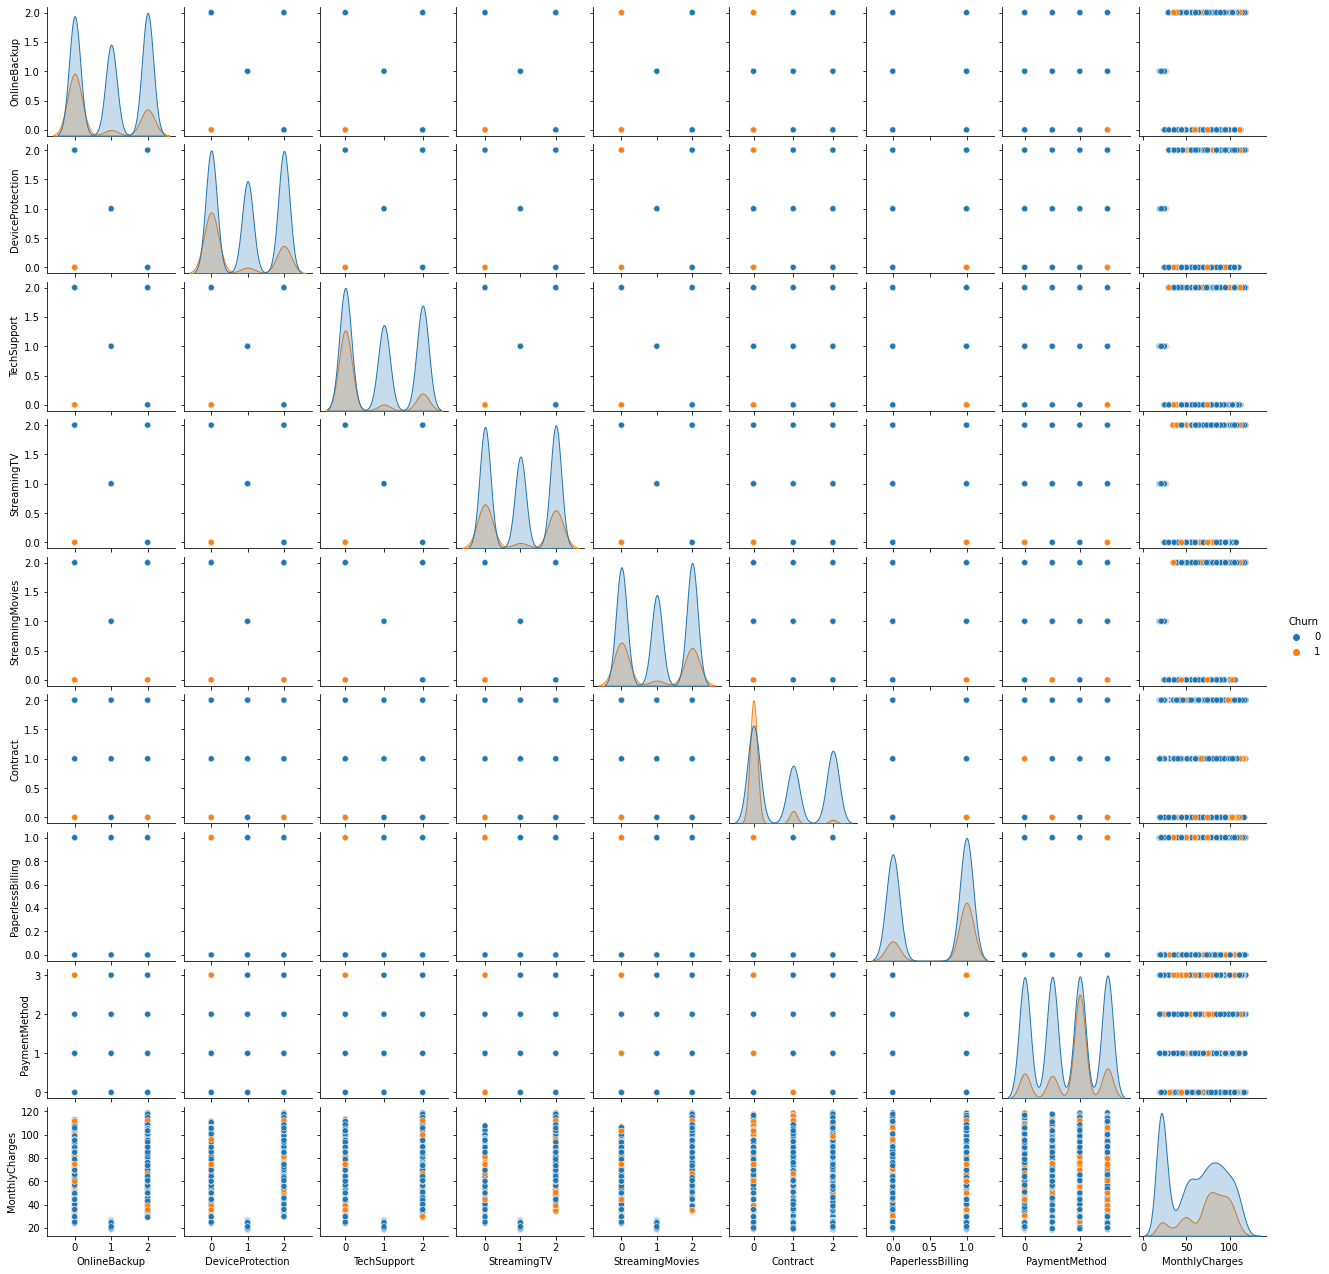

In [13]:
sns.pairplot(df.iloc[:,10:], hue="Churn", height=2)

* <a id="ins3">insight 4</a><br>
    - feature classes that seems to be related to our target:
        - PaymentMethod: 'Electronic check'
        - PaperlessBilling: 'Yes'
        - Contract: 'Month-to-month'
        - OnlineBackup: 'No'

Checking quantity of Churn customers in dataset:

<AxesSubplot:xlabel='Churn', ylabel='count'>

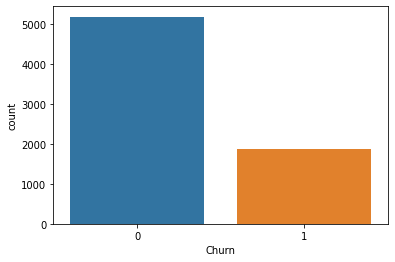

In [14]:
sns.countplot(x="Churn", data=df)

In [15]:
pd.DataFrame({'churn_qty': df.Churn.value_counts(), 
              'churn_percentage': round(df.Churn.value_counts()/df.shape[0],2)})

,churn_qty,churn_percentage
0,5174,0.73
1,1869,0.27


* <a id="ins5">insight 5</a><br>
clearly imbalanced dataset. There is much more Churn=0 (73%) than Churn=1 (27%). 

Later, maybe we can try some technique to balance it, but as a good practice, first let's obtain a benchmark result as is.

In [16]:
df.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

## <a id="prep">Preparing data</a>

As we already dealt with <a href="#ins1">insight 1</a>, let's now handle <a href="#ins2">insight 2</a>:

In [17]:
# converting column TotalCharges format from string to numeric, and filling its Null values with 0.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast="float", errors='coerce')

df = df.fillna(0)

And for <a href="#ins3">insight 3</a>:

In [18]:
df = df.drop(columns=['tenure', 'MultipleLines','PhoneService', 'gender', 'StreamingTV', 'StreamingMovies', 'InternetService'])

also dropping column 'customerID':

In [19]:
df = df.drop(columns=['customerID'])

And <a href="#ins4">insight 4</a> tells us that certain features should not be removed.

Now, let's prepare our data for the models we'll be using, and split our dataset in train and test sets:

#### Train/Test split

In [20]:
X = df.loc[:, df.columns != 'Churn'].values
y = df.Churn.values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaler

In [22]:
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(5634, 12)
(1409, 12)


Finnaly, according to <a href="#ins5">insight 5</a>, let's use <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a> to undersample the majority class (i.e. Churn=0) and <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE">SMOTE</a> to oversample the minority class (i.e. Churn=1).

#### Undersampling/oversampling

In [23]:
under = RandomUnderSampler(sampling_strategy=0.5)
(X_train, y_train) = under.fit_resample(X_train, y_train)

over = SMOTE()
(X_train, y_train) = over.fit_resample(X_train, y_train)

## <a id="models">Build and apply models</a>

For this problem, we are facing a classification task. So, let's try the following models and check its performances:
 - Random Forest
 - Logistic Regression
 - XGBoost
 - KNN Classifier
 - SVC
 - Neural Network

In [24]:
# create dict to store the accuracies

dict_results = {}

In [25]:
#Import Random Forest Model

clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train,y_train)

y_pred=clf_rf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# classification_report
print(classification_report(y_test, y_pred))
CR = classification_report(y_test, y_pred, output_dict=1)

a = metrics.accuracy_score(y_test, y_pred)
p = CR['1']['precision']
r = CR['1']['recall']
f = CR['1']['f1-score']

# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

dict_results['clf_rf']=[a,p,r,f]

Accuracy: 0.7650816181689141
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1036
           1       0.55      0.66      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409

     0    1
0  830  206
1  125  248


In [26]:
#Import Random Forest Model

clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train,y_train)

y_pred=clf_rf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# classification_report
print(classification_report(y_test, y_pred))
CR = classification_report(y_test, y_pred, output_dict=1)

a = metrics.accuracy_score(y_test, y_pred)
p = CR['1']['precision']
r = CR['1']['recall']
f = CR['1']['f1-score']

# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

dict_results['clf_rf']=[a,p,r,f]

Accuracy: 0.7721788502484032
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.67      0.61       373

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

     0    1
0  837  199
1  122  251


In [27]:
clf_lr=LogisticRegression(random_state=0)
clf_lr.fit(X_train,y_train)

y_pred=clf_lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# classification_report
print(classification_report(y_test, y_pred))
CR = classification_report(y_test, y_pred, output_dict=1)

a = metrics.accuracy_score(y_test, y_pred)
p = CR['1']['precision']
r = CR['1']['recall']
f = CR['1']['f1-score']

# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

dict_results['clf_lr']=[a,p,r,f]

Accuracy: 0.7395315826827538
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409

     0    1
0  737  299
1   68  305


In [28]:
clf_xgb = GradientBoostingClassifier(n_estimators=100)
clf_xgb.fit(X_train,y_train)

y_pred=clf_xgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# classification_report
print(classification_report(y_test, y_pred))
CR = classification_report(y_test, y_pred, output_dict=1)

a = metrics.accuracy_score(y_test, y_pred)
p = CR['1']['precision']
r = CR['1']['recall']
f = CR['1']['f1-score']

# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

dict_results['clf_xgb']=[a,p,r,f]

Accuracy: 0.7707594038325053
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

     0    1
0  794  242
1   81  292


In [29]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train,y_train)

y_pred=clf_knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# classification_report
print(classification_report(y_test, y_pred))
CR = classification_report(y_test, y_pred, output_dict=1)

a = metrics.accuracy_score(y_test, y_pred)
p = CR['1']['precision']
r = CR['1']['recall']
f = CR['1']['f1-score']

# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

dict_results['clf_knn']=[a,p,r,f]

Accuracy: 0.6969481902058198
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1036
           1       0.45      0.69      0.55       373

    accuracy                           0.70      1409
   macro avg       0.66      0.69      0.66      1409
weighted avg       0.75      0.70      0.71      1409

     0    1
0  725  311
1  116  257


In [30]:
clf_svc = SVC(gamma='auto')
clf_svc.fit(X_train,y_train)

y_pred=clf_svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# classification_report
print(classification_report(y_test, y_pred))
CR = classification_report(y_test, y_pred, output_dict=1)

a = metrics.accuracy_score(y_test, y_pred)
p = CR['1']['precision']
r = CR['1']['recall']
f = CR['1']['f1-score']

# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

dict_results['clf_svc']=[a,p,r,f]

Accuracy: 0.751596877217885
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.77      1409

     0    1
0  749  287
1   63  310


In [31]:
# building the model
n_features = X_train.shape[1]

clf_nn = Sequential()
clf_nn.add(Dense(units=30,activation='relu'))
clf_nn.add(Dense(units=15,activation='relu'))
clf_nn.add(Dense(units=10,activation='relu'))
clf_nn.add(Dense(units=5,activation='relu'))
clf_nn.add(Dense(units=1,activation='sigmoid'))

clf_nn.compile(loss='binary_crossentropy', optimizer='adam')

H = clf_nn.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=16,
          validation_data=(X_test, y_test), verbose=0)

y_pred=(clf_nn.predict(X_test) > 0.5)*1
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# classification_report
print(classification_report(y_test, y_pred))
CR = classification_report(y_test, y_pred, output_dict=1)

a = metrics.accuracy_score(y_test, y_pred)
p = CR['1']['precision']
r = CR['1']['recall']
f = CR['1']['f1-score']

# confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

# training loss history
# print(pd.DataFrame(H.history)[['loss','val_loss']].plot())

dict_results['clf_nn']=[a,p,r,f]

Accuracy: 0.7288857345635202
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1036
           1       0.49      0.74      0.59       373

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.73      0.74      1409

     0    1
0  750  286
1   96  277


In [32]:
total_metrics = pd.DataFrame(dict_results).T

cols = ['accuracy', 'precision', 'recall', 'f1-score']
total_metrics.columns=cols

total_metrics = total_metrics.sort_values('accuracy')

total_metrics.style.highlight_max(color='green')

,accuracy,precision,recall,f1-score
clf_knn,0.696948,0.452465,0.689008,0.546227
clf_nn,0.728886,0.492007,0.742627,0.591880
clf_lr,0.739532,0.504967,0.817694,0.624360
clf_svc,0.751597,0.519263,0.831099,0.639175
clf_xgb,0.770759,0.546816,0.782842,0.643881
clf_rf,0.772179,0.557778,0.672922,0.609964


Accuracy: 0.7530163236337828
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.81      0.75      0.77      1409



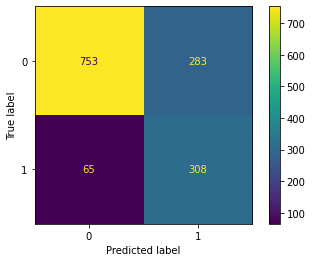

In [33]:
clf_ensemble = VotingClassifier(estimators=[('lr', clf_lr),
                                            ('svc', clf_svc),
                                            ('xgb', clf_xgb)],
                                voting='hard')

clf_ensemble.fit(X_train,y_train)

y_pred=(clf_ensemble.predict(X_test) > 0.5)*1
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# classification_report
print(classification_report(y_test, y_pred))

# confusion matrix
plot_confusion_matrix(clf_ensemble, X_test, y_test)

## <a id="fmodel">Build Final model</a>

Accuracy: 0.8051966491551895
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5174
           1       0.68      0.51      0.58      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.71      0.73      7043
weighted avg       0.79      0.81      0.80      7043



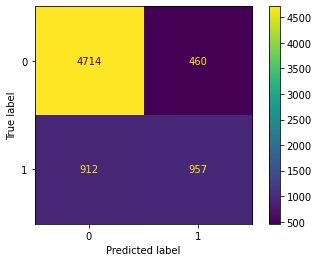

In [34]:
clf_ensemble = VotingClassifier(estimators=[('lr', clf_lr),
                                            ('svc', clf_svc),
                                            ('xgb', clf_xgb)],
                                voting='hard')


X_final= scaler.fit_transform(X)
clf_ensemble.fit(X_final,y)

y_pred=(clf_ensemble.predict(X_final) > 0.5)*1
print("Accuracy:",metrics.accuracy_score(y, y_pred))

# classification_report
print(classification_report(y, y_pred))

# confusion matrix
plot_confusion_matrix(clf_ensemble, X_final, y)

## <a id="export">Export model</a>

In [35]:
joblib.dump(scaler,'churn_scaler.pkl')
joblib.dump(clf_ensemble, 'churn_model.joblib')

['churn_model.joblib']

#### deployment code

In [36]:
import joblib

churn_scaler = joblib.load("churn_scaler.pkl")
churn_model = joblib.load('churn_model.joblib')

def return_prediction(model, scaler, customer_json):
            
    sample = [i for i in customer_json.values()]
    customer = np.array(sample).reshape(-1,12)
    
    scaled_customer = scaler.transform(customer)
    
    classes = np.array(['no churn', 'churn'])
    
    class_ind = (model.predict(scaled_customer) > 0.5)*1
    
    return classes[class_ind][0]

#### testing:

In [37]:
n=4
sample = df.iloc[n,:-1]
customer_json = dict(sample)

print(customer_json, '\n')
print(df.iloc[n,-1])

return_prediction(churn_model, churn_scaler, customer_json)

{'SeniorCitizen': 0.0, 'Partner': 0.0, 'Dependents': 0.0, 'OnlineSecurity': 0.0, 'OnlineBackup': 0.0, 'DeviceProtection': 0.0, 'TechSupport': 0.0, 'Contract': 0.0, 'PaperlessBilling': 1.0, 'PaymentMethod': 2.0, 'MonthlyCharges': 70.7, 'TotalCharges': 151.64999389648438} 

1


'churn'